In [16]:
import unittest
import numpy as np

class Variable:
    def __init__(self,data):
        if data is not None:
            if not isinstance(data,np.ndarray):
                raise TypeError('{} is not supported'.format(type(data)))
                
        self.data=data
        self.grad=None
        self.creator=None
        
    def set_creator(self, func):
        self.creator = func

#    def backward(self):
#        f=self.creator              #1.関数を取得
#       if f is not None:
#          x=f.input                     #2.関数の入力を取得
#          x.grad= f.backward(self.grad) #3.関数のbackwardメソッドを呼ぶ
#          x.backward()                  #4.自分より一つ前の変数のbackwardメソッドを呼ぶ(再帰)

    def backward(self):
        if self.grad is None:
            self.grad = np.ones_like(self.data)

        funcs=[self.creator]                  #1.関数を取得
        while funcs:
            f=funcs.pop() #関数取得
            x,y=f.input,f.output #関数の入出力を取得
            x.grad = f.backward(y.grad) #backwardメソッドを呼ぶ
            if x.creator is not None:
              funcs.append(x.creator) #1つ前の関数をリストに追加

def as_array(x):
    if np.isscalar(x):
        return np.array(x)
    return x
            
class Function:
    def __call__(self, inputs):
        xs = [x.data for x in inputs]  # Get data from Variable
        ys = self.forward(xs)
        outputs = [Variable(as_array(y)) for y in ys]  # Wrap data

        for output in outputs:
            output.set_creator(self)
        self.inputs = inputs
        self.outputs = outputs
        return outputs

    def forward(self, xs):
        raise NotImplementedError()

    def backward(self, gys):
        raise NotImplementedError()

class Add(Function):
    def forward(self, xs):
        x0, x1 = xs
        y = x0 + x1
        return (y,)


class Square(Function):
    def forward(self,x):
        y=x**2
        return y

    def backward(self,gy):
        x=self.input.data
        gx=2*x*gy
        return gx

class Exp(Function):
    def forward(self,x):
        y=np.exp(x)
        return y
    
    def backward(self,gy):
        x=self.input.data
        gx=np.exp(x)*gy
        return gx

def numerical_diff(f,x,eps=1e-4):
  x0=Variable(x.data-eps)
  x1=Variable(x.data+eps)
  y0=f(x0)
  y1=f(x1)
  return(y1.data-y0.data)/(2*eps)

class SquareTest(unittest.TestCase):
    def test_forward(self):
        x = Variable(np.array(2.0))
        y = square(x)
        expected = np.array(4.0)
        self.assertEqual(y.data, expected)

    def test_backward(self):
        x=variable(np.array(3.0))
        y=square(x)
        y.backward()
        expected=np.array(6.0)
        self.assertEqual(x.grad,expected)
        
    def test_gradient_check(self):
        x=Variable(np.random.rand(1)) #ランダムな入力値を生成
        y=square(x)
        y.backward()
        num_grad=numerical_diff(square, x)
        flg = np.allclose(x.grad, num_grad)
        self.assertTrue(flg)
        
class Add(Function):
    def forward(self,xs):
        x0,x1=xs
        y=x0 + x1
        return(y,)
        
def square(x):
  return Square()(x)

def exp(x):
  return Exp()(x)

xs = [Variable(np.array(2)), Variable(np.array(3))]
f = Add()
ys = f(xs)
y = ys[0]
print(y.data)

#x=Variable(np.array(0.5))
#y=square(exp(square(x)))


#a=square(x)
#b=exp(a)
#y=square(b)

#A=Square()
#B=Exp()
#C=Square()

#x=Variable(np.array(0.5))
#a=A(x)
#b=B(a)
#y=C(b)

#逆伝播
#y.grad = np.array(1.0)
#y.backward()
#print(x.grad)

#C=y.creator #1.関数を取得
#b=C.input   #2.関数の入力を取得
#b.grad=C.backward(y.grad) #3.関数のbackwardメソッドを呼ぶ
#
#B=b.creator #1.関数を取得
#a=B.input   #2.関数の入力を取得
#a.grad=B.backward(b.grad) #3.関数のbackwardメソッドを呼ぶ

#A=a.creator #1.関数を取得
#x=A.input   #2.関数の入力を取得
#x.grad=A.backward(a.grad) #3.関数のbackwardメソッドを呼ぶ
#print(x.grad)

#逆向きに計算グラフのノードを辿る,assertはTrueでなければエラーを出力する。20.12.04エラーは出なかった。
#assert y.creator == C
#assert y.creator.input == b
#assert y.creator.input.creator == B
#assert y.creator.input.creator.input ==a
#assert y.creator.input.creator.input.creator ==A
#assert y.creator.input.creator.input.creator.input == x

#y.grad=np.array(1.0)
#b.grad=C.backward(y.grad)
#a.grad=B.backward(b.grad)
#x.grad=A.backward(a.grad)
#print(x.grad)

#x=Variable(np.array(0.5))
#dy=numerical_diff(f,x)
#print(dy)

#f=Square()
#x=Variable(np.array(2.0))
#dy=numerical_diff(f,x)
#print(dy)

#A=Square()
#B=Exp()
#C=Square()

#x=Variable(np.array(0.5))
#a=A(x)
#b=B(a)
#y=C(b)
#print(y.data)

#x=Variable(np.array(10))
#f=Square()
#y=f(x)

#print(type(y))
#print(y.data)



5


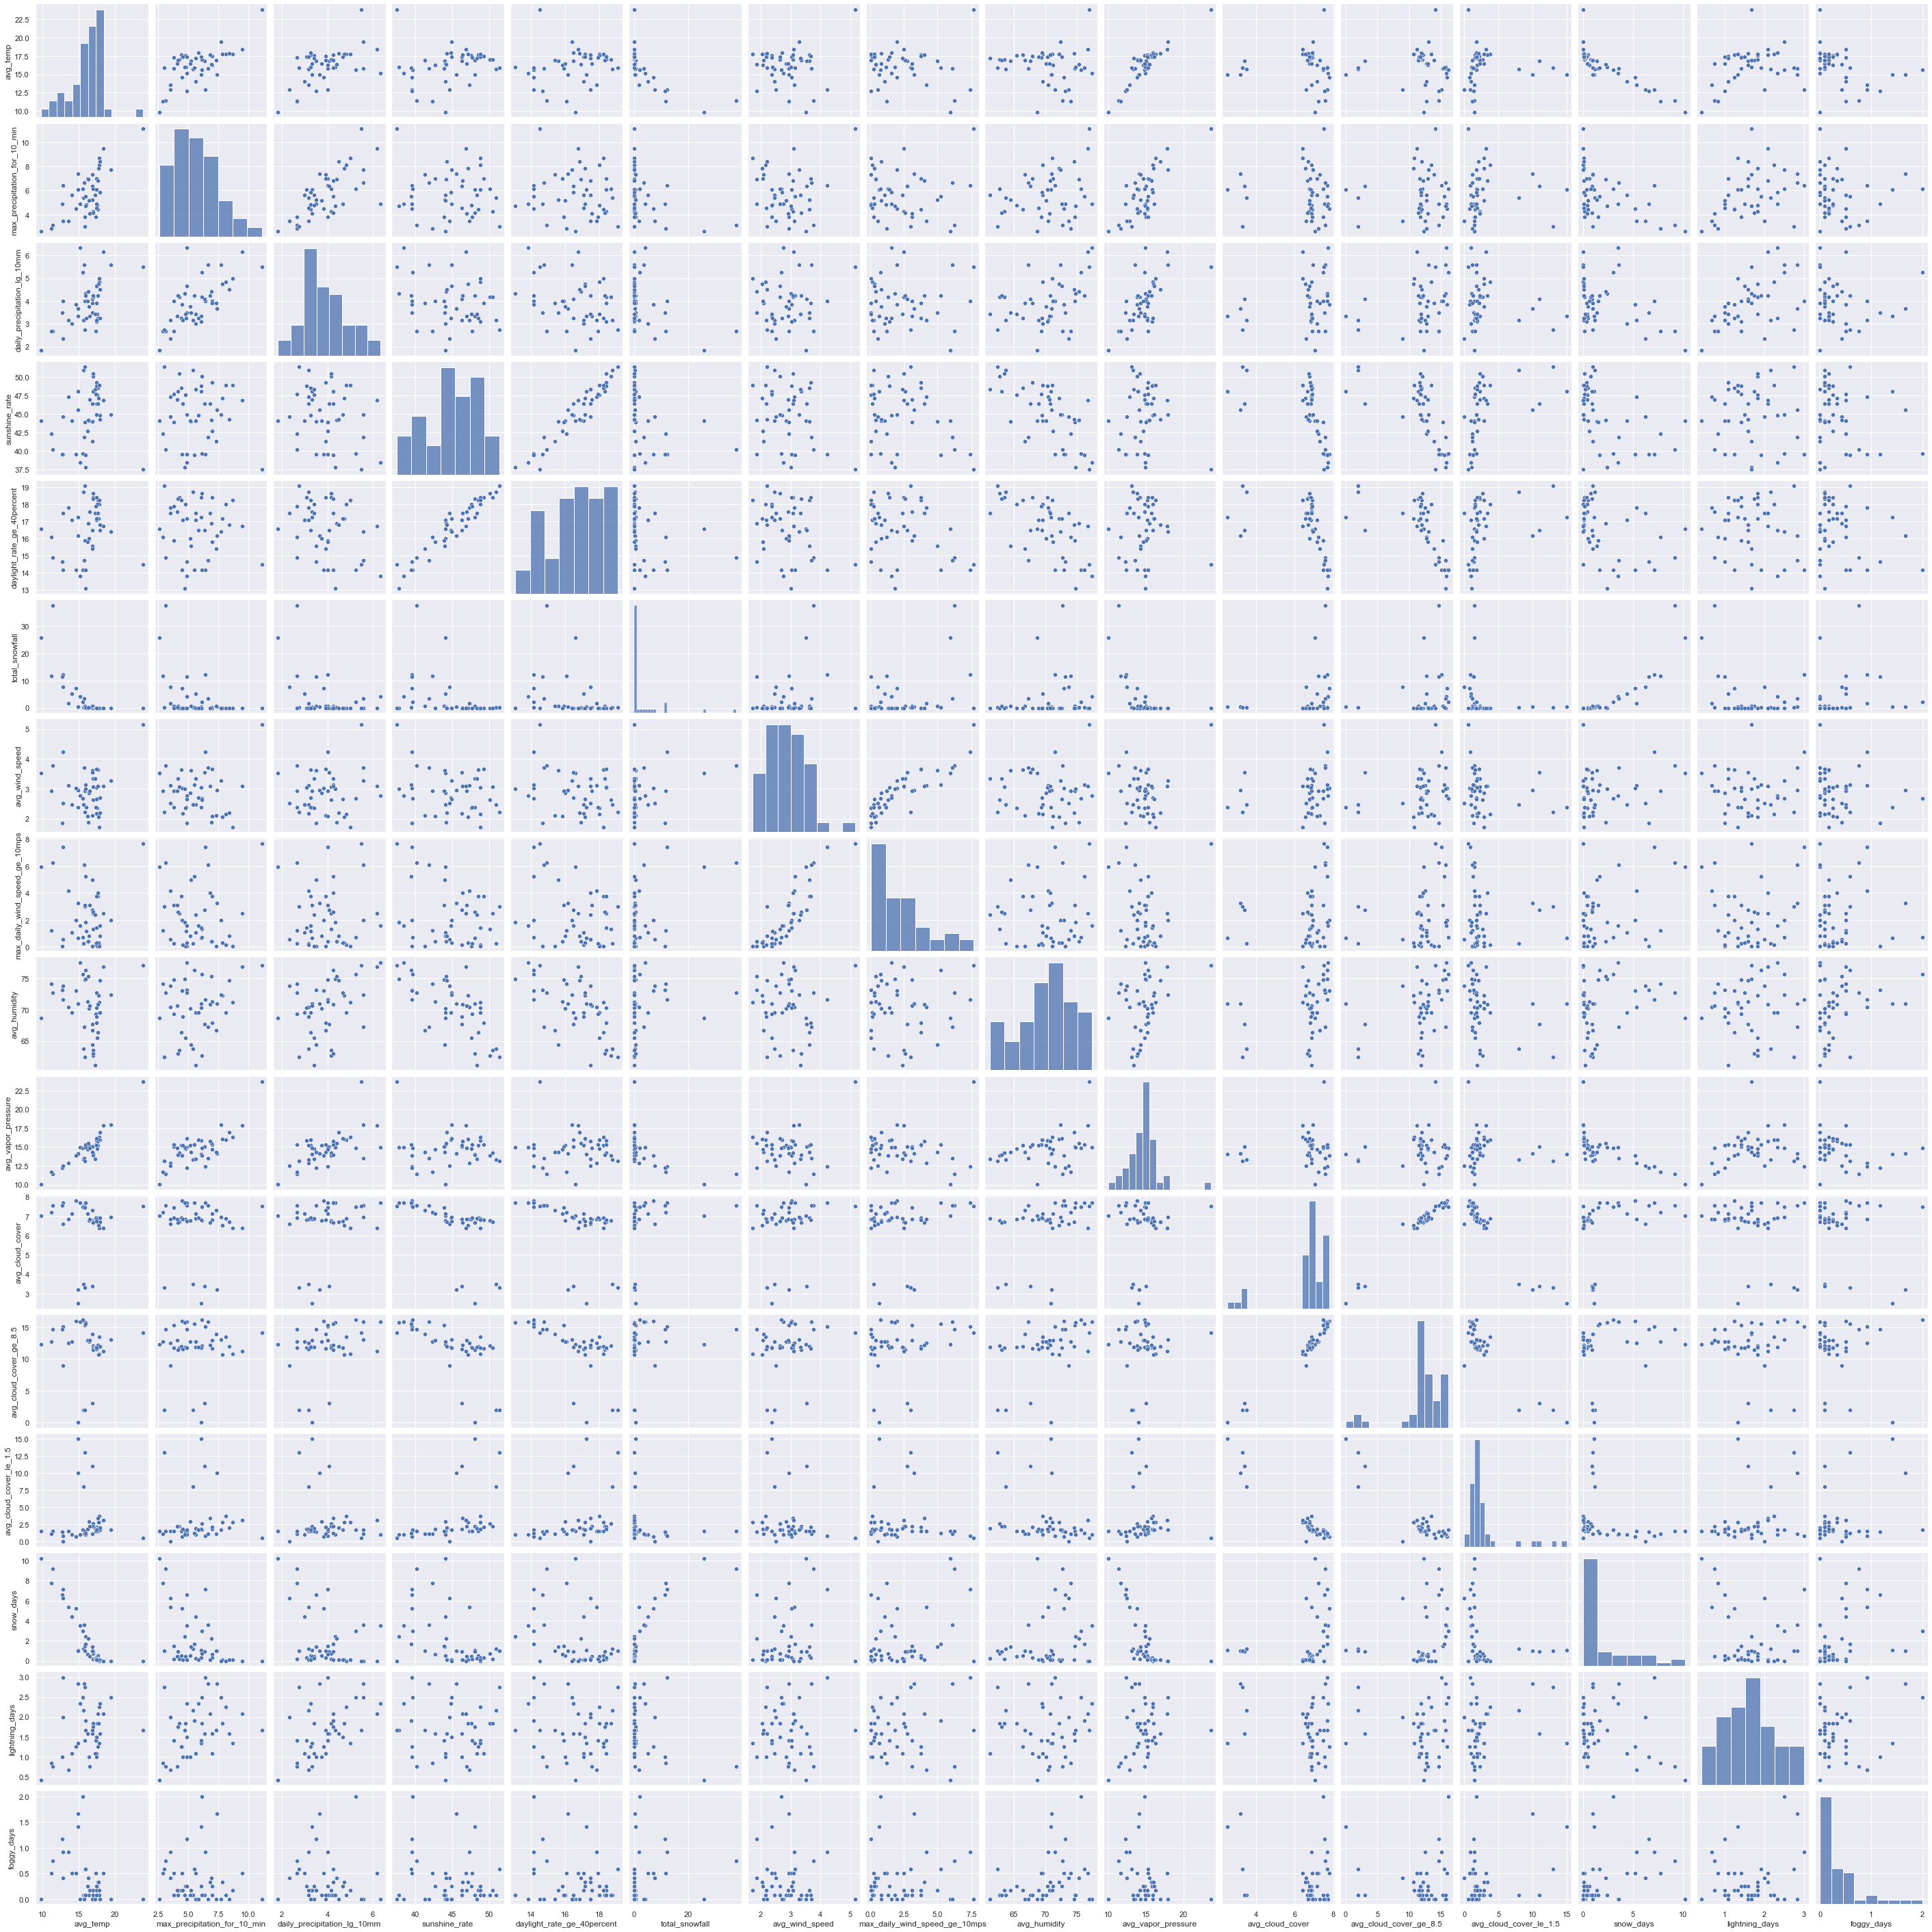

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

DATA_PATH="/Users/akihi/OneDrive/デスクトップ/個人フォルダ/Python/data/"
FILE_NAME='prefecture_weather2019.csv'
FILE_NAME2='pref_code.csv'
weather=pd.read_csv(DATA_PATH+FILE_NAME,header=1)
pref_code_table=pd.read_csv(DATA_PATH+FILE_NAME2)
pref_code_table.T
weather=pd.merge(weather,pref_code_table,on='pref_code')
sns.pairplot(weather.drop('pref_code',axis=1))

 ドライブ C のボリューム ラベルは Windows です
 ボリューム シリアル番号は A21A-0653 です

 C:\Users\akihi\OneDrive\デスクトップ\個人フォルダ\Python のディレクトリ

2020/09/09  17:37           109,773 (修正前)-天津振泰化工-Evaluation questionnaire.xlsx
2020/12/14  11:36    <DIR>          .
2020/12/14  11:36    <DIR>          ..
2020/12/03  16:24    <DIR>          .ipynb_checkpoints
2020/11/30  19:13    <DIR>          __pycache__
2020/08/13  09:07           161,978 20200813(出荷伝票).pdf
2020/09/16  22:50           158,128 20200813(出荷伝票)r.pdf
2020/10/26  11:57            86,773 -2020年-コンサルタント作業管理表.xlsx
2020/09/17  01:13               739 age.py
2020/05/05  00:51         1,949,691 allminutes.pdf
2020/04/12  23:27               119 allMycats1.bat
2020/04/12  23:15               573 allMycats1.py
2020/04/05  23:04               344 allMycats2.py
2020/04/23  13:22             1,448 backupToZip.py
2020/04/19  18:08                39 bacon.txt
2020/04/08  17:03               590 birthdays.py
2020/12/01  13:04                86 Book1.csv
2020/04/23  17:30